# Dairy Data Trends in the United States and beyond

In [47]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
import requests
import json

In [48]:
# Import annual data as DataFrame
annual_milk_production = pd.read_csv("Resources/us_annual_milk_production_16-18.csv")
annual_milk_production.head()

,Milk Production,2016,2017,2018
0,Production (23 States) (Mil. lb.),"199,434","202,455","204,825"
1,Milk cows (23 States) (Thou.),"8,653","8,725","8,734"
2,Milk per cow (23 States) (Lb.),"23,049","23,204","23,451"
3,Production (U.S. estimate) (Mil. Lb.),"212,405","215,466","217,476"


In [49]:
reset_milk_production = annual_milk_production.set_index('Milk Production')
reset_milk_production

,2016,2017,2018
Milk Production,,,
Production (23 States) (Mil. lb.),"199,434","202,455","204,825"
Milk cows (23 States) (Thou.),"8,653","8,725","8,734"
Milk per cow (23 States) (Lb.),"23,049","23,204","23,451"
Production (U.S. estimate) (Mil. Lb.),"212,405","215,466","217,476"


In [50]:
transpose_milk_production = reset_milk_production.transpose()
transpose_milk_production

Milk Production,Production (23 States) (Mil. lb.),Milk cows (23 States) (Thou.),Milk per cow (23 States) (Lb.),Production (U.S. estimate) (Mil. Lb.)
2016,"199,434","8,653","23,049","212,405"
2017,"202,455","8,725","23,204","215,466"
2018,"204,825","8,734","23,451","217,476"


In [51]:
annual_milk_price = pd.read_csv("Resources/us_annual_milk_price_16-18.csv")
annual_milk_price.head()

,Milk Price,2016,2017,2018
0,All milk (Dol./cwt),16.30,17.60,16.20
1,Class III (cheese milk) 3.5% fat (Dol./cwt),14.87,16.17,14.61
2,Class IV (butter-powder milk) 3.5% fat (Dol./cwt),13.77,15.16,14.23


In [52]:
reset_milk_price = annual_milk_price.set_index('Milk Price')
reset_milk_price

,2016,2017,2018
Milk Price,,,
All milk (Dol./cwt),16.30,17.60,16.20
Class III (cheese milk) 3.5% fat (Dol./cwt),14.87,16.17,14.61
Class IV (butter-powder milk) 3.5% fat (Dol./cwt),13.77,15.16,14.23


In [53]:
transpose_milk_price = reset_milk_price.transpose()
transpose_milk_price


Milk Price,All milk (Dol./cwt),Class III (cheese milk) 3.5% fat (Dol./cwt),Class IV (butter-powder milk) 3.5% fat (Dol./cwt)
2016,16.3,14.87,13.77
2017,17.6,16.17,15.16
2018,16.2,14.61,14.23


In [54]:
merge_production_price = transpose_milk_production.merge(transpose_milk_price, on=transpose_milk_production.index)
merge_production_price

,key_0,Production (23 States) (Mil. lb.),Milk cows (23 States) (Thou.),Milk per cow (23 States) (Lb.),Production (U.S. estimate) (Mil. Lb.),All milk (Dol./cwt),Class III (cheese milk) 3.5% fat (Dol./cwt),Class IV (butter-powder milk) 3.5% fat (Dol./cwt)
0,2016,"199,434","8,653","23,049","212,405",16.3,14.87,13.77
1,2017,"202,455","8,725","23,204","215,466",17.6,16.17,15.16
2,2018,"204,825","8,734","23,451","217,476",16.2,14.61,14.23


In [55]:
reset_merge = merge_production_price.set_index('key_0')
reset_merge

,Production (23 States) (Mil. lb.),Milk cows (23 States) (Thou.),Milk per cow (23 States) (Lb.),Production (U.S. estimate) (Mil. Lb.),All milk (Dol./cwt),Class III (cheese milk) 3.5% fat (Dol./cwt),Class IV (butter-powder milk) 3.5% fat (Dol./cwt)
key_0,,,,,,,
2016,"199,434","8,653","23,049","212,405",16.3,14.87,13.77
2017,"202,455","8,725","23,204","215,466",17.6,16.17,15.16
2018,"204,825","8,734","23,451","217,476",16.2,14.61,14.23


In [56]:
renamed_milk_price_production = reset_merge.rename_axis('Year')
renamed_milk_price_production 

,Production (23 States) (Mil. lb.),Milk cows (23 States) (Thou.),Milk per cow (23 States) (Lb.),Production (U.S. estimate) (Mil. Lb.),All milk (Dol./cwt),Class III (cheese milk) 3.5% fat (Dol./cwt),Class IV (butter-powder milk) 3.5% fat (Dol./cwt)
Year,,,,,,,
2016,"199,434","8,653","23,049","212,405",16.3,14.87,13.77
2017,"202,455","8,725","23,204","215,466",17.6,16.17,15.16
2018,"204,825","8,734","23,451","217,476",16.2,14.61,14.23


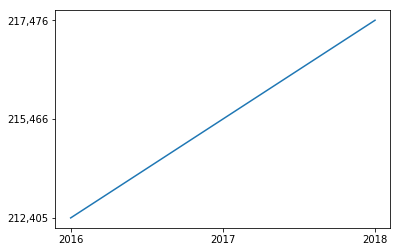

In [57]:
# Plot the line
x_axis = renamed_milk_price_production.index
y_axis = renamed_milk_price_production["Production (U.S. estimate) (Mil. Lb.)"]

plt.plot(x_axis, y_axis)
plt.show()

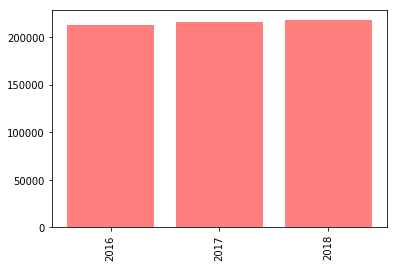

In [58]:
#Chart Milk Production as Bar Chart
#plt.figure(figsize=(20,3))
y_pos_bar = np.arange(len(renamed_milk_price_production))
amount_string = renamed_milk_price_production["Production (U.S. estimate) (Mil. Lb.)"]
height= [int(i.replace(',', '')) for i in amount_string] 
tick_locations = [value for value in y_pos_bar]
plt.bar(y_pos_bar, height, color='r', alpha=0.5 )
plt.xticks(tick_locations, amount_string.index, rotation="vertical")
plt.show()

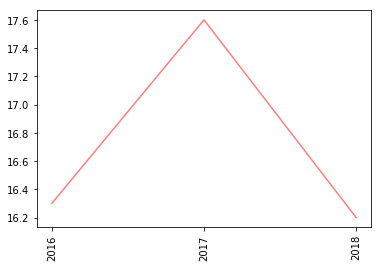

In [59]:
#Chart Milk Price as Line Chart

y_pos_line= np.arange(len(renamed_milk_price_production))
line_height = renamed_milk_price_production["All milk (Dol./cwt)"]
tick_locations = [value for value in y_pos_line]
plt.plot(y_pos_line, line_height, color='r', alpha=0.5 )
plt.xticks(tick_locations, line_height.index, rotation="vertical")
plt.show()

[0.146, 0.157, 0.145]


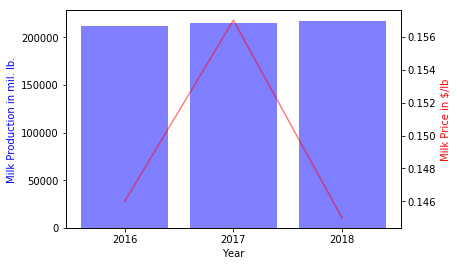

In [60]:
#Create Bar Chart // Line Chart Combination

fig, ax1 = plt.subplots()
amount_string = renamed_milk_price_production["Production (U.S. estimate) (Mil. Lb.)"]

#If want to convert Million lbs to CWT // divid the mass by 112
#212,405,000,000 / 112 = 1896473214.28571 cwt

height= [int(i.replace(',', '')) for i in amount_string] 
y_pos_bar = amount_string.index
tick_locations = [value for value in y_pos_bar]
ax1.bar(y_pos_bar, height, color='b', alpha=0.5 )
ax1.set_ylabel('Milk Production in mil. lb.', color='b')
ax1.set_xlabel('Year')
ax1.tick_params(tick_locations, colors='b')
#If want to convert $/CWT to $/pounds then divid $/cwt by 112 lbs
#16.3 $/cwt = 16.3/112 = 0.145 $/lb

ax2 = ax1.twinx()

y_pos_line= np.arange(len(renamed_milk_price_production))
line_height = renamed_milk_price_production["All milk (Dol./cwt)"]
#print(line_height)

#Convert CWT to pounds // multiply the mass value by 112
line_height_converted = [round((value/112),3) for value in line_height]
print(line_height_converted)

tick_locations = [value for value in y_pos_line]
ax2.plot(y_pos_line, line_height_converted, color='r', alpha=0.5 )
ax2.set_ylabel("Milk Price in $/lb", color = "r")


#fig.tight_layout()
plt.show()


In [61]:
# Import annual data of price and production from 2010 - 2019 as DataFrame
annual_milk_production_price = pd.read_csv("Resources/us_annual_milk_production_price_10-19.csv")
annual_milk_production_price

,Year,Production (billion lb.),Production (lbs.),Price ($/cwt),Price ($/lb.)
0,2010,192.80,192800000000,16.29,0.145
1,2011,196.10,196100000000,20.50,0.183
2,2012,200.30,200300000000,18.50,0.165
3,2013,201.20,201200000000,19.15,0.171
4,2014,206.00,206000000000,23.97,0.214
5,2015,208.60,208600000000,17.13,0.153
6,2016,212.41,212410000000,16.30,0.146
7,2017,215.47,215000000000,17.60,0.157
8,2018,217.48,217480000000,16.20,0.145
9,2019,219.70,219700000000,16.37,0.146


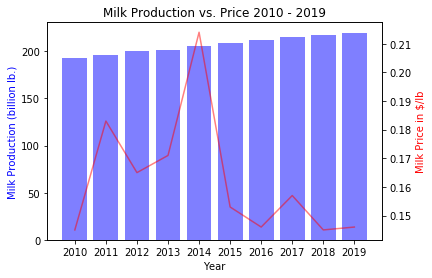

In [62]:
#Create Bar Chart // Line Chart Combination

fig, ax1 = plt.subplots()

#Bar Chart
height= annual_milk_production_price["Production (billion lb.)"] 
y_pos_bar = np.arange(len(annual_milk_production_price))
tick_labels = [value for value in annual_milk_production_price["Year"]]
ax1.bar(y_pos_bar, height, color='b', alpha=0.5 )
ax1.set_ylabel('Milk Production (billion lb.)', color='b')
ax1.set_xlabel('Year')
ax1.set_xticks(y_pos_bar)
ax1.set_xticklabels(tick_labels)
ax1.set_title('Milk Production vs. Price 2010 - 2019')

ax2 = ax1.twinx()

y_pos_line= np.arange(len(annual_milk_production_price))
line_height = annual_milk_production_price["Price ($/lb.)"]
ax2.plot(y_pos_line, line_height, color='r', alpha=0.5 )
ax2.set_ylabel("Milk Price in $/lb", color = "r")

# Save Figure
plt.savefig("Outputs/MilkProductionvsPrice.png")

#Show Figure
#fig.tight_layout()
plt.show()





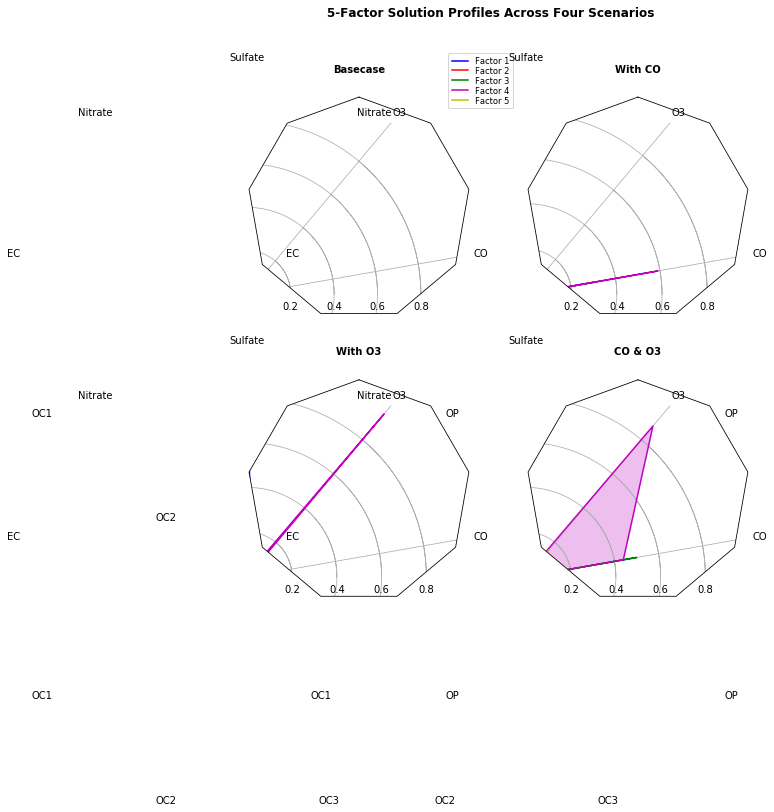

In [63]:
def radar_factory(num_vars, frame='circle'):
    
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    # rotate theta such that the first axis is at the top
    theta += np.pi/2

    def draw_poly_patch(self):
        verts = unit_poly_verts(theta)
        return plt.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        # unit circle centered on (0.5, 0.5)
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict:
        raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        # define draw_frame method
        draw_patch = patch_dict[frame]

        def fill(self, *args, **kwargs):
            #"""Override fill so that line is closed by default"""
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            #"""Override plot so that line is closed by default"""
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)
            # The following is a hack to get the spines (i.e. the axes frame)
            # to draw correctly for a polygon frame.

            # spine_type must be 'left', 'right', 'top', 'bottom', or `circle`.
            spine_type = 'circle'
            verts = unit_poly_verts(theta)
            # close off polygon by repeating first vertex
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta


def unit_poly_verts(theta):
    #"""Return vertices of polygon for subplot axes.

    #This polygon is circumscribed by a unit circle centered at (0.5, 0.5)
    #"""
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See  doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolized Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    data = [
        ['Sulfate', 'Nitrate', 'EC', 'OC1', 'OC2', 'OC3', 'OP', 'CO', 'O3'],
        ('Basecase', [
            [0.88, 0.01, 0.03, 0.03, 0.00, 0.06, 0.01, 0.00, 0.00],
            [0.07, 0.95, 0.04, 0.05, 0.00, 0.02, 0.01, 0.00, 0.00],
            [0.01, 0.02, 0.85, 0.19, 0.05, 0.10, 0.00, 0.00, 0.00],
            [0.02, 0.01, 0.07, 0.01, 0.21, 0.12, 0.98, 0.00, 0.00],
            [0.01, 0.01, 0.02, 0.71, 0.74, 0.70, 0.00, 0.00, 0.00]]),
        ('With CO', [
            [0.88, 0.02, 0.02, 0.02, 0.00, 0.05, 0.00, 0.05, 0.00],
            [0.08, 0.94, 0.04, 0.02, 0.00, 0.01, 0.12, 0.04, 0.00],
            [0.01, 0.01, 0.79, 0.10, 0.00, 0.05, 0.00, 0.31, 0.00],
            [0.00, 0.02, 0.03, 0.38, 0.31, 0.31, 0.00, 0.59, 0.00],
            [0.02, 0.02, 0.11, 0.47, 0.69, 0.58, 0.88, 0.00, 0.00]]),
        ('With O3', [
            [0.89, 0.01, 0.07, 0.00, 0.00, 0.05, 0.00, 0.00, 0.03],
            [0.07, 0.95, 0.05, 0.04, 0.00, 0.02, 0.12, 0.00, 0.00],
            [0.01, 0.02, 0.86, 0.27, 0.16, 0.19, 0.00, 0.00, 0.00],
            [0.01, 0.03, 0.00, 0.32, 0.29, 0.27, 0.00, 0.00, 0.95],
            [0.02, 0.00, 0.03, 0.37, 0.56, 0.47, 0.87, 0.00, 0.00]]),
        ('CO & O3', [
            [0.87, 0.01, 0.08, 0.00, 0.00, 0.04, 0.00, 0.00, 0.01],
            [0.09, 0.95, 0.02, 0.03, 0.00, 0.01, 0.13, 0.06, 0.00],
            [0.01, 0.02, 0.71, 0.24, 0.13, 0.16, 0.00, 0.50, 0.00],
            [0.01, 0.03, 0.00, 0.28, 0.24, 0.23, 0.00, 0.44, 0.88],
            [0.02, 0.00, 0.18, 0.45, 0.64, 0.55, 0.86, 0.00, 0.16]])
    ]
    return data


if __name__ == '__main__':
    N = 9
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axes = plt.subplots(figsize=(9, 9), nrows=2, ncols=2,
                             subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    for ax, (title, case_data) in zip(axes.flatten(), data):
        ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
        ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    ax = axes[0, 0]
    labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
    legend = ax.legend(labels, loc=(0.9, .95),
                       labelspacing=0.1, fontsize='small')

    fig.text(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',
             horizontalalignment='center', color='black', weight='bold',
             size='large')

    plt.show()